In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
vars = ['PassengerId', 'Survived','Pclass']

for i in vars:
    df[i] = df[i].astype(str)

df.dtypes

PassengerId     object
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df[df['Fare'] == 0].sort_values(by=['Ticket'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S


In [6]:
df.isna().sum()/df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

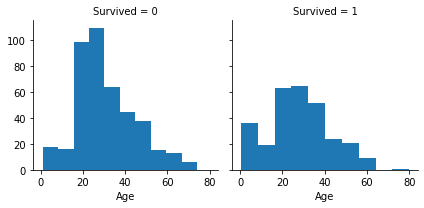

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(data = df[df['Age'].notna()], col = 'Survived')
g.map(plt.hist,"Age")

In [11]:
def age(data):
    age = data
    
    age_per = age.isna().value_counts()[1]/age.shape[0]
    age_per_not = age.isna().value_counts()[0]/age.shape[0]
    
    plt.pie([age_per,age_per_not], labels = ['True','False'], autopct = '%1.1f')

In [12]:
dt0 = df['Age'][df['Survived'] == '0']
dt1 = df['Age'][df['Survived'] == '1']           

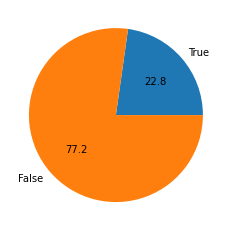

In [13]:
age(dt0)

In [14]:
cat = ['Pclass', 'Sex', 'Embarked']

for v in cat:
    print('\n{}'.format(v))
    print(df[v].value_counts())


Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

Sex
male      577
female    314
Name: Sex, dtype: int64

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [15]:
df_clean = df.copy()

def cat(var):
    
    new = []
    
    for i in range(len(df[var])):
        abc = df[var].replace(np.nan,'_n/a')
        
        new.append(abc[i][0])
        
    df_clean[var] = new

In [16]:
cat('Embarked')

In [21]:
df_clean['Embarked'].value_counts()

S    644
C    168
Q     77
_      2
Name: Embarked, dtype: int64